In [174]:
import numpy as np
import inspect
import matplotlib.pyplot as plt

class Perceptron:
    '''
    Simple perceptron class
    '''
    def __init__(self, n_iter = 100, lr = 0.1):
        '''
        Define constant parameters
        param n_iter: n iterations
        param lr: learning rate
        '''
        self.lr = lr
        self.n_iter = n_iter
        self.errors = []
        self.fit_called = False
    
    def fit(self, X, y):
        '''
        Fitting model.
        param X: feature array
        param y: labels
        '''
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.random.randn(X_bias.shape[1])
        self.fit_called = True
        for i in range(self.n_iter):
            output = np.where(X_bias.dot(self.w) > 0, 1, -1)
            self.w += self.lr * (y - output).dot(X_bias) 
            self.errors.append(np.sum(y!=output))
    
    def decision(self, X):
        '''
        Return decision values
        '''
        assert self.fit_called, 'Call "Fit" before this'
        if isinstance(X, (list, tuple)):
            X = np.array(X)
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_bias.dot(self.w)
    
    def predict(self, X):
        '''
        Return 1 or -1 depends on decision value
        1 => decision > 0
        -1 => decision < 0
        '''
        return np.where(self.decision(X) > 0, 1, -1)

In [177]:
from sklearn.datasets import make_blobs
X, y = make_blobs(cluster_std=1.3)
y = np.where(y == 0, -1, 1)

In [178]:
y

array([ 1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
        1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1])

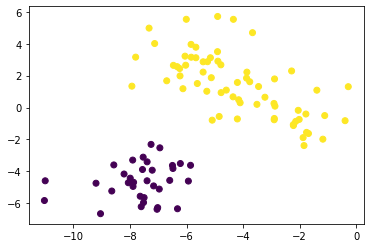

In [179]:
plt.scatter(X[:,0], X[:,1], c=y)

In [180]:
MCP = Perceptron(100, 0.01)

In [181]:
MCP.fit(X, y)

In [182]:
MCP.predict(np.array([[-6, -10]]))

array([-1])

In [183]:
def mesh_grid_visual(X, y, model, label_dict = None):
    markers = {1: 'x', -1: 'o'}
    colors_dict = {1: 'green', -1: 'blue'}
    x0 = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 100)
    x1 = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 100)
    a,b = np.meshgrid(x0, x1)
    X_new = np.c_[a.ravel(), b.ravel()]
    predictions = model.predict(X_new)
    decision = model.decision(X_new)
    plt.contourf(x0, x1, predictions.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.4)
    plt.contourf(x0, x1, decision.reshape(a.shape), cmap=plt.cm.brg, alpha = 0.2)
    for yy in np.unique(y):
        if label_dict != None:
            plt.scatter(X[y == yy, 0], X[y==yy, 1], marker = markers[yy], c = colors_dict[yy], label = label_dict[yy])
        else:
            plt.scatter(X[y == yy, 0], X[y==yy, 1], marker = markers[yy], c = colors_dict[yy], label = yy)
            
    plt.legend(loc = 'upper left')

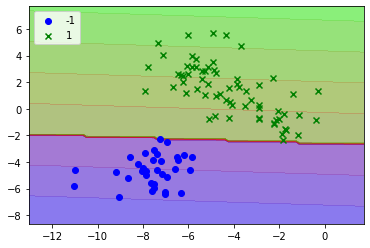

In [184]:
mesh_grid_visual(X, y, MCP)

In [185]:
import pandas as pd

In [186]:
df = pd.read_csv('Datasets/iris.data', header = None)

In [187]:
df.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'kind']

In [188]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [189]:
X = df.iloc[0:100,[0,2]].values 
y = df.iloc[0:100, 4].values

In [190]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [191]:
# -1 => Iris-setosa
# 1 => Iris- versicolor
label_dict = {-1: 'Iris-setosa', 1: 'Iris-versicolor'}
y_encoded = np.where(y_encoded == 0, -1, 1)
y_encoded

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

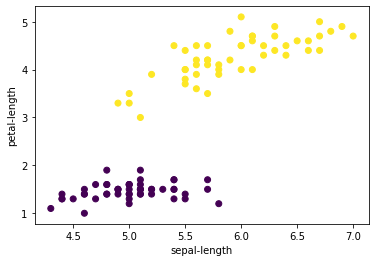

In [192]:
plt.scatter(X[:, 0], X[:, 1], c = y_encoded)
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.show()

In [193]:
iris_perceptron = Perceptron(n_iter=10, lr=0.05)
iris_perceptron.fit(X, y_encoded)

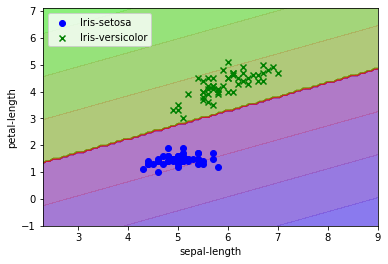

In [194]:
mesh_grid_visual(X, y_encoded, iris_perceptron, label_dict)
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.show()

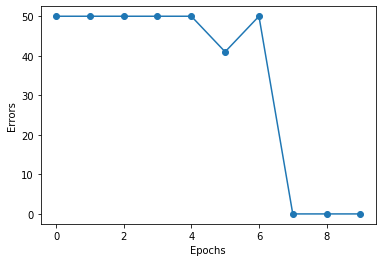

In [195]:
plt.plot(range(len(iris_perceptron.errors)), iris_perceptron.errors, marker = 'o')
plt.ylabel('Errors')
plt.xlabel('Epochs')
plt.show()